In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

In [2]:
headers = ["Test", "Avg (us)", "Low 95th (us)", "High 95th (us)"]
title = "Bitmap Allocator (first fit)"
file_format = 'rendered/bitmap_first_fit_{0}_optimization_5.png'
is_alloc = True

data_alloc = [
    ["Baseline", 140.20931, 161.967, 119.46],
    ["MarkBlocks memset optimization", 141.98858, 162.978, 121.597],
    ["FindFreeRegion entire bytes", 48.620222, 55.021, 38.399],
    ["uint32 instead of uint8", 45.681314, 54.452, 38.687],
    ["Next fit", 30.104007, 42.257, 26.753],
    ["Best fit", 191.34481, 244.055, 143.076],
    ["Worst fit", 339.30504, 394.87, 288.011],
]
data_free = [
    ["Baseline", 26.056452, 26.958, 25.335],
    ["MarkBlocks memset optimization", 24.687148, 26.079, 23.884],
    ["FindFreeRegion entire bytes", 26.032175, 26.083, 25.158],
    ["uint32 instead of uint8", 26.772401, 27.794, 26.106],
    ["Next fit", 25.392118, 26.222, 24.914],
    ["Best fit", 25.392118, 26.222, 24.914],
    ["Worst fit", 25.392118, 26.222, 24.914],
]

if is_alloc:
    data = data_alloc
    title += ' - Allocate'
    file = file_format.format('allocate')
else:
    data = data_free
    title += ' - Free'
    file = file_format.format('free')

In [3]:

data = pd.DataFrame(data, columns=headers)
data

,Test,Avg (us),Low 95th (us),High 95th (us)
0,Baseline,140.209310,161.967,119.460
1,MarkBlocks memset optimization,141.988580,162.978,121.597
2,FindFreeRegion entire bytes,48.620222,55.021,38.399
3,uint32 instead of uint8,45.681314,54.452,38.687
4,Next fit,30.104007,42.257,26.753
5,Best fit,191.344810,244.055,143.076
6,Worst fit,339.305040,394.870,288.011


In [4]:
# Calculate error
error = [np.subtract(data['Low 95th (us)'], data['Avg (us)']),
         np.subtract(data['Avg (us)'], data['High 95th (us)'])]
error

[0    21.757690
 1    20.989420
 2     6.400778
 3     8.770686
 4    12.152993
 5    52.710190
 6    55.564960
 dtype: float64,
 0    20.749310
 1    20.391580
 2    10.221222
 3     6.994314
 4     3.351007
 5    48.268810
 6    51.294040
 dtype: float64]

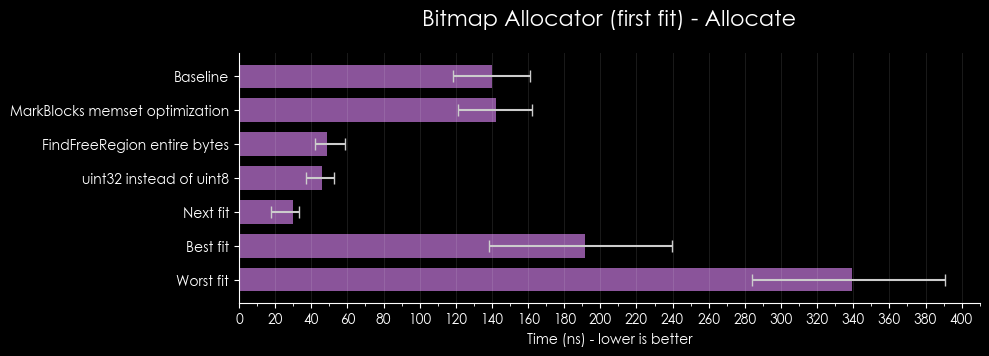

In [6]:
plt.style.use('dark_background')
plt.rcParams['font.family'] = 'Century Gothic'
base_height = 1.04
row_height = 0.375
plt.figure(figsize=(10, base_height + row_height * len(data.index)))
plt.title(title, fontsize=16, pad=20)
plt.gca().invert_yaxis()
ax = plt.subplot()
ax.barh(data['Test'],
        data['Avg (us)'],
        color='#C678DD',
        xerr=error,
        ecolor='#ccc',
        alpha=0.7,
        capsize=4,
        height=.7)
ax.set_xlabel('Time (ns) - lower is better')
ax.xaxis.set_major_locator(MultipleLocator(20))
ax.xaxis.set_minor_locator(MultipleLocator(10))
ax.grid(True, axis='x', color='white', alpha=.1)
ax.spines[['right', 'top']].set_visible(False)
fig = plt.gcf()
fig.tight_layout()
fig.savefig(file, transparent=True, dpi=300)
plt.show()